In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from surprise import SVD,SVDpp,NMF,SlopeOne,NormalPredictor,KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore,BaselineOnly,CoClustering
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
import os
from surprise import dump

In [158]:
review_restaurant = pd.read_csv('yelp_dataset/review_restaurant.csv')
review_restaurant

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1,-Yz2wIcsdJxUOFMbTgoKQA
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1,jYcf_e5p0UG0S-9gJq_tNA
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1,nQC0JiPIk_jCooRDxpuw5A
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1,Gv_-mtOKhWFtCjn9xFe0SQ
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1,pabMYegF28KjHQ5hybAJ0A
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0,F_N4NyoMJWzBYFspeYfH3A
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1,oGYEaOv0IEUZ6kU3JFe98A
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3,EeKyqz_A6xeQ7ezuloqxyg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1,ks6vHMFVaPACB18GO7XUig
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3,pngNlr9t4HObDgecGH_jaw


In [159]:
df = review_restaurant.copy()
#df.business_id = df.business_id.astype('category').cat.codes.values
#df.user_id = df.user_id.astype('category').cat.codes.values

In [160]:
df

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1,-Yz2wIcsdJxUOFMbTgoKQA
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1,jYcf_e5p0UG0S-9gJq_tNA
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1,nQC0JiPIk_jCooRDxpuw5A
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1,Gv_-mtOKhWFtCjn9xFe0SQ
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1,pabMYegF28KjHQ5hybAJ0A
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0,F_N4NyoMJWzBYFspeYfH3A
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1,oGYEaOv0IEUZ6kU3JFe98A
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3,EeKyqz_A6xeQ7ezuloqxyg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1,ks6vHMFVaPACB18GO7XUig
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3,pngNlr9t4HObDgecGH_jaw


In [161]:
df["stars"].unique()

array([5., 4., 3., 2., 1.])

In [162]:
df = df[["user_id","business_id","stars"]]

In [163]:
df

,user_id,business_id,stars
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,5.0
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,4.0
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,5.0
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.0
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.0
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,4.0
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,4.0
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,5.0
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,4.0
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,4.0


In [164]:
reader = Reader(rating_scale=(1, 10))#(rating_scale=(0, 9))
data = Dataset.load_from_df(df[["user_id","business_id","stars"]], reader)

In [262]:
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.2)


In [273]:
# whole dataset.
whole_trainset =data.build_full_trainset()

In [275]:
whole_trainset

In [166]:
trainset

In [167]:
data

In [168]:
testset

[('tUohgzlAniH1Rx9KfHvF5A', 'BORPULADzZV6_LJZzcsywQ', 1.0),
 ('qZPs4dsxuE_dYpl8XGsHHQ', 'UTXNr62dGSK-tet8OeXUcQ', 1.0),
 ('siDeQhbZKMuohLzvtxyaug', '31cOttU_tML5b6eLLXZfsQ', 4.0),
 ('vIm0Ji35bY64hPoGs4WNwA', 'K7fip0nDFFdCC7OCnNOotQ', 4.0),
 ('PXqR3CiJ4bXPctmIh4l0wg', 'TwwMvP-1LEK9GMd5ge1Mug', 5.0),
 ('75hmvYoy9gX2zFt0H051EQ', 'NvKNe9DnQavC9GstglcBJQ', 2.0),
 ('DhZnSoyq3mVUsADMJw6JDw', 'uUlq6chIVb0I8AehlET5bQ', 4.0),
 ('oeAhRa8yFa9jtrhaHnOyxQ', 'f9sU31meK0bqAD7922sCog', 5.0),
 ('iDVdNuv9rZS0UOVmzDYqOw', 'zU9w_xRlQSRIYXxGo-HSOA', 4.0),
 ('34hXR_GQFc-fFGwzlOxscg', 'uHUcYpGlcdlu5m7oiZGY6w', 1.0),
 ('OgSr0Rv2snXtuc9aSViDQA', '4JHGVuanHAu5n8DxvVcuVw', 4.0),
 ('MmRvV4OOziW-4jrSde2jdQ', 'rbcfYmJtqwIkk17IeOI5Kw', 5.0),
 ('AJSvuT6U9O7mHemCGp6gdw', 'PRBSiB7ytkLKHVZoBYPxpQ', 5.0),
 ('9u9fQhq0hynxjLQgZGpmSA', 'yHYjDPuRtLvhvMpOn5fXOQ', 4.0),
 ('5CagU5fQkQF1bgSZ8F7oNw', 'k5rV_nKkYQHX0ebB3qV2kQ', 5.0),
 ('JDRRNcZd74ruLa1TpvBdGw', 'vwpsor_zVUTJJkp301Dpog', 5.0),
 ('M-xJMhi-HphpWaD2992K3A', 'IBKNR0-FL_Y

## Model Selection 

In [11]:
### random data for compare Model
df_rndm = df.sample(frac=0.1)
df_rndm

,user_id,business_id,stars
1294388,148143,2126,4.0
720646,210439,8407,2.0
634610,303644,1520,4.0
809907,371282,1511,3.0
299022,379555,2240,1.0
977266,99368,2184,1.0
181065,71232,7546,2.0
203024,417186,6419,3.0
211283,255569,5359,4.0
491213,461345,6380,4.0


In [12]:
data_rndm = Dataset.load_from_df(df_rndm[["user_id","business_id","stars"]], reader)

In [13]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.8657


1.8656827777152118

In [14]:
benchmark = []

In [21]:
# Model Selection (SVD(), SVDpp(), NMF())

#for algorithm in [SVD(), SVDpp(), NMF()]:
for algorithm in [SVD(), NMF()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


In [17]:
benchmark

[test_rmse    1.86317
 fit_time     55.6116
 test_time    4.88514
 Algorithm        SVD
 dtype: object, test_rmse    1.72072
 fit_time     85.0624
 test_time    4.72027
 Algorithm        NMF
 dtype: object, test_rmse    1.86325
 fit_time     333.711
 test_time    16.8338
 Algorithm      SVDpp
 dtype: object]

In [22]:
for algorithm in [SVDpp()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


In [23]:
# KNNBaseline(), KNNBasic(), KNNWithMeans()
for algorithm in [KNNBaseline()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [15]:
for algorithm in [KNNBasic()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [16]:
for algorithm in [KNNWithMeans()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [17]:
#KNNWithZScore(), BaselineOnly(), CoClustering()
for algorithm in [KNNWithZScore()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [18]:
# BaselineOnly()
for algorithm in [BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [19]:
# NormalPredictor()
for algorithm in [NormalPredictor()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


In [20]:
for algorithm in [CoClustering()]:

    results = cross_validate(algorithm, data_rndm, measures=['RMSE'], cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


In [37]:
benchmark_df = pd.DataFrame(benchmark).set_index('Algorithm')  
benchmark_df.sort_values('test_rmse') 

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.294359,5.211608,0.419213
BaselineOnly,1.294511,0.549799,0.640268
SVDpp,1.304186,10.976010,0.533377
KNNBaseline,1.311450,1741.734577,5.259883
KNNBasic,1.402531,322.429563,2.685486
CoClustering,1.447688,7.907368,0.368682
NMF,1.465912,9.423707,0.407857
KNNWithMeans,1.474938,302.057903,3.041615
KNNWithZScore,1.475091,298.396801,2.620544


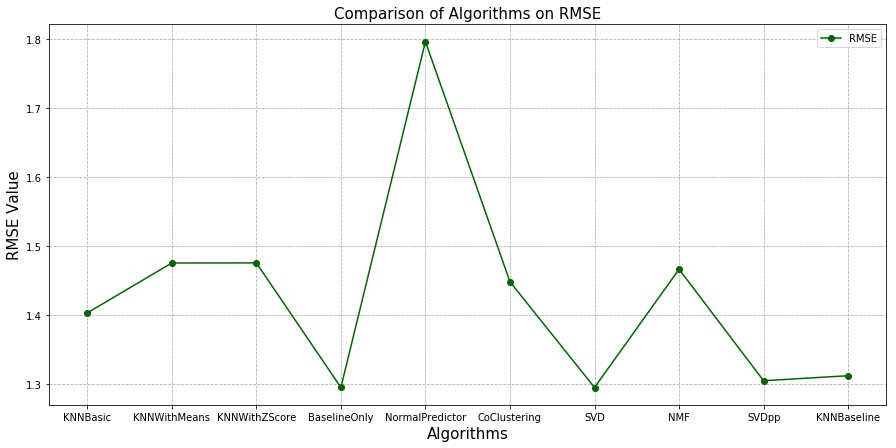

In [50]:
plt.figure(figsize=(15,7))

#plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(benchmark_df.index, benchmark_df.test_rmse, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

## SVD 

#### GridSearch

In [ ]:
# SVD
svd_param_grid = {'n_epochs': [10,5], 
                  'lr_all': [0.004,0.002],
                  'reg_all': [ 0.2,0.1]}

svd_gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=3)
svd_gs.fit(data)

In [25]:
print('RMSE =', svd_gs.best_params['rmse'])
print('MAE =', svd_gs.best_params['mae'])

RMSE = {'n_epochs': 10, 'lr_all': 0.004, 'reg_all': 0.2}
MAE = {'n_epochs': 10, 'lr_all': 0.004, 'reg_all': 0.2}


In [23]:
print('RMSE =', svd_gs.best_params['rmse'])
print('MAE =', svd_gs.best_params['mae'])

RMSE = {'n_epochs': 5, 'lr_all': 0.0005, 'reg_all': 0.1}
MAE = {'n_epochs': 5, 'lr_all': 0.0005, 'reg_all': 0.1}


In [15]:
print('RMSE =', svd_gs.best_params['rmse'])
print('MAE =', svd_gs.best_params['mae'])

RMSE = {'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.2}
MAE = {'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.2}


In [ ]:
algo = svd_gs.best_estimator['rmse']
algo.fit(trainset) #data.build_full_trainset())


In [41]:
param_grid ={'n_factors': [110, 160], 'n_epochs': [90, 110], 'lr_all': [0.001, 0.008], 'reg_all': [0.08, 0.15]}
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=2,  n_jobs =2)
gs_svd.fit(data)


KeyboardInterrupt: 

In [12]:
param_grid ={'n_factors': [160], 'n_epochs': [110], 'lr_all': [0.001], 'reg_all': [0.08]}
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=2,  n_jobs =2)
gs_svd.fit(data)

KeyboardInterrupt: 

In [11]:
algo = gs_svd.best_estimator['rmse']
print(gs_svd.best_score['rmse'])
print(gs_svd.best_params['rmse'])
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

NameError: name 'gs_svd' is not defined

### test traing & prediction 

In [169]:

#predictions = algo.fit(trainset).test(testset)
#accuracy.rmse(predictions)
# 'n_epochs': [90, 100, 110], 'lr_all': [0.001, 0.003, 0.005, 0.008], 'reg_all': [0.08, 0.1, 0.15]}


algo_svd = SVD(n_epochs=90, lr_all=0.001, reg_all=0.02)
algo_svd.fit(trainset)


In [219]:
test_pred = algo_svd.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)


SVD : Test Set
RMSE: 1.2568


1.2568020025785345

In [15]:
test_pred

[Prediction(uid='n_a826hPtfMFnucaVwnqIg', iid='WhYep5bRqXpaejOTH6ukbw', r_ui=5.0, est=3.9732509887958725, details={'was_impossible': False}),
 Prediction(uid='VizhcyMWWPz3UDXEBeix4w', iid='WO1sgbYB6u6VVcvChanp5g', r_ui=3.0, est=2.5009560461233926, details={'was_impossible': False}),
 Prediction(uid='zbrH2lnZgWicvwoXR0qcSg', iid='--9e1ONYQuAa-CB_Rrw7Tw', r_ui=5.0, est=3.9496579059806454, details={'was_impossible': False}),
 Prediction(uid='3C9NRS1MpGpD5pMi2jdwfA', iid='Cu5icjH_psCatgvN4fU1-A', r_ui=1.0, est=4.043726801060705, details={'was_impossible': False}),
 Prediction(uid='6RUKRj1qsBB79r0OY5D8vA', iid='PgJgpW4TKQ8IoALH2Yq-zA', r_ui=3.0, est=2.986186475518076, details={'was_impossible': False}),
 Prediction(uid='EfnzVzqWJUVEv8ft3fW2sQ', iid='DPcLpPpsdWUvfHoreMRxpw', r_ui=5.0, est=4.073103961602166, details={'was_impossible': False}),
 Prediction(uid='UvFhbG9eHJNNxYiHGluJSA', iid='CoyeXg8FBsS_d20QzNIy-A', r_ui=5.0, est=4.693692989196055, details={'was_impossible': False}),
 Predictio

In [16]:
testset

[('n_a826hPtfMFnucaVwnqIg', 'WhYep5bRqXpaejOTH6ukbw', 5.0),
 ('VizhcyMWWPz3UDXEBeix4w', 'WO1sgbYB6u6VVcvChanp5g', 3.0),
 ('zbrH2lnZgWicvwoXR0qcSg', '--9e1ONYQuAa-CB_Rrw7Tw', 5.0),
 ('3C9NRS1MpGpD5pMi2jdwfA', 'Cu5icjH_psCatgvN4fU1-A', 1.0),
 ('6RUKRj1qsBB79r0OY5D8vA', 'PgJgpW4TKQ8IoALH2Yq-zA', 3.0),
 ('EfnzVzqWJUVEv8ft3fW2sQ', 'DPcLpPpsdWUvfHoreMRxpw', 5.0),
 ('UvFhbG9eHJNNxYiHGluJSA', 'CoyeXg8FBsS_d20QzNIy-A', 5.0),
 ('1B9erGPgzf5nNe4NhK5YUw', 'FvVSy2r7_zDEhZWqLgjXNQ', 5.0),
 ('BOrmi9CpQj4iwzMdQ8PCww', 'HyKxWC9PrqlODjO-CBCIZA', 5.0),
 ('bHufZ2OTlC-OUxBDRXxViw', 'TrN8HBHBL4-Tu7cXMDoopQ', 1.0),
 ('PNfajj7D2Z7WtmwjrMqroQ', 'lYsq47uDzdjYUGtyUq8aaQ', 5.0),
 ('lK2oZIv40SAgLxdRbkxRBg', '1-Jdq5Up9SgKoqptGvkXHA', 5.0),
 ('nzihaF3BlgfZ4LzY_2vYOQ', 'fLulwQszkSpXj5JB7dUfxw', 5.0),
 ('GksgDgj09Zl8foywi_Egmw', 'w8RWhhuKxMiFCpvFvIQ3zg', 2.0),
 ('qwBzdApvDLOu5wxDyPj3SQ', 'slx9qstc2U2Tc4s7dzbbBg', 4.0),
 ('_Ojr37qJFwX0zZ2S0WtVqQ', 'FykLjv4tIq618q8F2pvTKg', 3.0),
 ('jfVSivKzooLix3qm01q_aw', 'iIwKW2cBAxj

In [218]:
#(n_epochs=90, lr_all=0.001, reg_all=0.02)
algo_svd_ = SVD(n_epochs=110, lr_all=0.002, reg_all=0.05)
algo_svd_.fit(trainset)
test_pred_ = algo_svd_.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred_, verbose=True)


SVD : Test Set
RMSE: 1.2551


1.2551408121782262

In [276]:
#(n_epochs=90, lr_all=0.001, reg_all=0.02)
algo_svd_ = SVD(n_epochs=130, lr_all=0.003, reg_all=0.07)
algo_svd_.fit(whole_trainset)
test_pred_ = algo_svd_.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred_, verbose=True)


SVD : Test Set
RMSE: 0.4444


0.44437232926889053

# input data 

In [17]:
df

,user_id,business_id,stars
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,5.0
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,4.0
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,5.0
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.0
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.0
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,4.0
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,4.0
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,5.0
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,4.0
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,4.0


In [18]:
df.groupby("user_id").agg({"count"})["business_id"].sort_values("count",ascending=False)

,count
user_id,
bLbSNkLggFnqwNNzzq-Ijw,1643
PKEzKWv_FktMm2mGPjwd0Q,1182
U4INQZOPSUaj8hMjLlZ3KA,928
UYcmGbelzRa0Q6JqzLoguw,842
n86B7IkbU20AkxlFX_5aew,807
3nDUQBjKyVor5wV0reJChg,790
qewG3X2O4X6JKskxyyqFwQ,612
C2C0GPKvzWWnP57Os9eQ0w,609
N3oNEwh0qgPqPP3Em6wJXw,593


In [19]:
tmp = df.groupby("business_id").agg({"count"})["user_id"].sort_values("count",ascending=False)
tmp.reset_index()

,business_id,count
0,4JNXUYY8wbaaDmk3BPzlWw,8570
1,RESDUcs7fIiihp38-d6_6g,8568
2,K7lWdNUhCbcnEvI0NhGewg,6887
3,f4x1YBxkLrZg652xt2KR5g,5847
4,cYwJA2A6I12KNkm2rtXd5g,5575
5,DkYS3arLOhA8si5uUEmHOw,5206
6,2weQS-RnoOBhb1KsHKyoSQ,4534
7,5LNZ67Yw9RD6nf4_UhXOjw,4522
8,iCQpiavjjPzJ5_3gPD5Ebg,4351
9,ujHiaprwCQ5ewziu0Vi9rw,4318


In [56]:
# reviews 1643
df_test_usr1 = tmp.reset_index()
df_test_usr1.drop('count', axis=1, inplace=True)
df_test_usr1["user_id"] = "bLbSNkLggFnqwNNzzq-Ijw"
df_test_usr1

,business_id,user_id
0,4JNXUYY8wbaaDmk3BPzlWw,bLbSNkLggFnqwNNzzq-Ijw
1,RESDUcs7fIiihp38-d6_6g,bLbSNkLggFnqwNNzzq-Ijw
2,K7lWdNUhCbcnEvI0NhGewg,bLbSNkLggFnqwNNzzq-Ijw
3,f4x1YBxkLrZg652xt2KR5g,bLbSNkLggFnqwNNzzq-Ijw
4,cYwJA2A6I12KNkm2rtXd5g,bLbSNkLggFnqwNNzzq-Ijw
5,DkYS3arLOhA8si5uUEmHOw,bLbSNkLggFnqwNNzzq-Ijw
6,2weQS-RnoOBhb1KsHKyoSQ,bLbSNkLggFnqwNNzzq-Ijw
7,5LNZ67Yw9RD6nf4_UhXOjw,bLbSNkLggFnqwNNzzq-Ijw
8,iCQpiavjjPzJ5_3gPD5Ebg,bLbSNkLggFnqwNNzzq-Ijw
9,ujHiaprwCQ5ewziu0Vi9rw,bLbSNkLggFnqwNNzzq-Ijw


In [57]:
# review 377
df_test_usr2 = tmp.reset_index()
df_test_usr2.drop('count', axis=1, inplace=True)
df_test_usr2["user_id"] = "3Vd_ATdvvuVVgn_YCpz8fw"
df_test_usr2

,business_id,user_id
0,4JNXUYY8wbaaDmk3BPzlWw,3Vd_ATdvvuVVgn_YCpz8fw
1,RESDUcs7fIiihp38-d6_6g,3Vd_ATdvvuVVgn_YCpz8fw
2,K7lWdNUhCbcnEvI0NhGewg,3Vd_ATdvvuVVgn_YCpz8fw
3,f4x1YBxkLrZg652xt2KR5g,3Vd_ATdvvuVVgn_YCpz8fw
4,cYwJA2A6I12KNkm2rtXd5g,3Vd_ATdvvuVVgn_YCpz8fw
5,DkYS3arLOhA8si5uUEmHOw,3Vd_ATdvvuVVgn_YCpz8fw
6,2weQS-RnoOBhb1KsHKyoSQ,3Vd_ATdvvuVVgn_YCpz8fw
7,5LNZ67Yw9RD6nf4_UhXOjw,3Vd_ATdvvuVVgn_YCpz8fw
8,iCQpiavjjPzJ5_3gPD5Ebg,3Vd_ATdvvuVVgn_YCpz8fw
9,ujHiaprwCQ5ewziu0Vi9rw,3Vd_ATdvvuVVgn_YCpz8fw


In [130]:
# review 1
df_test_usr3 = tmp.reset_index()
df_test_usr3.drop('count', axis=1, inplace=True)
df_test_usr3["user_id"] = "WBM2VUZpYT3X-hpGVrwuAA"
df_test_usr3


,business_id,user_id
0,4JNXUYY8wbaaDmk3BPzlWw,WBM2VUZpYT3X-hpGVrwuAA
1,RESDUcs7fIiihp38-d6_6g,WBM2VUZpYT3X-hpGVrwuAA
2,K7lWdNUhCbcnEvI0NhGewg,WBM2VUZpYT3X-hpGVrwuAA
3,f4x1YBxkLrZg652xt2KR5g,WBM2VUZpYT3X-hpGVrwuAA
4,cYwJA2A6I12KNkm2rtXd5g,WBM2VUZpYT3X-hpGVrwuAA
5,DkYS3arLOhA8si5uUEmHOw,WBM2VUZpYT3X-hpGVrwuAA
6,2weQS-RnoOBhb1KsHKyoSQ,WBM2VUZpYT3X-hpGVrwuAA
7,5LNZ67Yw9RD6nf4_UhXOjw,WBM2VUZpYT3X-hpGVrwuAA
8,iCQpiavjjPzJ5_3gPD5Ebg,WBM2VUZpYT3X-hpGVrwuAA
9,ujHiaprwCQ5ewziu0Vi9rw,WBM2VUZpYT3X-hpGVrwuAA


In [131]:
# review 0
df_test_usr4 = tmp.reset_index()
df_test_usr4.drop('count', axis=1, inplace=True)
df_test_usr4["user_id"] = "ABCDEFG"
df_test_usr4

,business_id,user_id
0,4JNXUYY8wbaaDmk3BPzlWw,ABCDEFG
1,RESDUcs7fIiihp38-d6_6g,ABCDEFG
2,K7lWdNUhCbcnEvI0NhGewg,ABCDEFG
3,f4x1YBxkLrZg652xt2KR5g,ABCDEFG
4,cYwJA2A6I12KNkm2rtXd5g,ABCDEFG
5,DkYS3arLOhA8si5uUEmHOw,ABCDEFG
6,2weQS-RnoOBhb1KsHKyoSQ,ABCDEFG
7,5LNZ67Yw9RD6nf4_UhXOjw,ABCDEFG
8,iCQpiavjjPzJ5_3gPD5Ebg,ABCDEFG
9,ujHiaprwCQ5ewziu0Vi9rw,ABCDEFG


In [291]:
# all of review data 
df_test_usr5 = df.copy()
df_test_usr5.drop('stars', axis=1, inplace=True)
#df_test_usr5["user_id"] = "ABCDEFG"
df_test_usr5

,user_id,business_id
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg


In [267]:
# test
df_test_usr6 = tmp.reset_index()
df_test_usr6.drop('count', axis=1, inplace=True)
df_test_usr6["user_id"] = "F_N4NyoMJWzBYFspeYfH3A"
df_test_usr6

,business_id,user_id
0,4JNXUYY8wbaaDmk3BPzlWw,F_N4NyoMJWzBYFspeYfH3A
1,RESDUcs7fIiihp38-d6_6g,F_N4NyoMJWzBYFspeYfH3A
2,K7lWdNUhCbcnEvI0NhGewg,F_N4NyoMJWzBYFspeYfH3A
3,f4x1YBxkLrZg652xt2KR5g,F_N4NyoMJWzBYFspeYfH3A
4,cYwJA2A6I12KNkm2rtXd5g,F_N4NyoMJWzBYFspeYfH3A
5,DkYS3arLOhA8si5uUEmHOw,F_N4NyoMJWzBYFspeYfH3A
6,2weQS-RnoOBhb1KsHKyoSQ,F_N4NyoMJWzBYFspeYfH3A
7,5LNZ67Yw9RD6nf4_UhXOjw,F_N4NyoMJWzBYFspeYfH3A
8,iCQpiavjjPzJ5_3gPD5Ebg,F_N4NyoMJWzBYFspeYfH3A
9,ujHiaprwCQ5ewziu0Vi9rw,F_N4NyoMJWzBYFspeYfH3A


In [283]:
df[(df["user_id"] == 'tH0uKD-vNwMoEc3Xk3Cbdg') & (df['business_id'] =='5EFyoyw2uGUa_wPkILbUCQ')]

,user_id,business_id,stars


In [284]:
df[(df["user_id"] == 'tH0uKD-vNwMoEc3Xk3Cbdg')]

,user_id,business_id,stars
5954,tH0uKD-vNwMoEc3Xk3Cbdg,GMrwDXRlAZU2zj5nH6l4vQ,4.0
15161,tH0uKD-vNwMoEc3Xk3Cbdg,arv3T_av9OoVo3SvxV4TXw,4.0
20882,tH0uKD-vNwMoEc3Xk3Cbdg,Vs7gc9EE3k9wARuUcN9piA,4.0
26312,tH0uKD-vNwMoEc3Xk3Cbdg,WRQ-9LluyivReFiQZFUujw,4.0
28811,tH0uKD-vNwMoEc3Xk3Cbdg,Yiw2jUJzUdFmglHZgj4RaQ,4.0
40336,tH0uKD-vNwMoEc3Xk3Cbdg,ZPwx7ktiVluGFVg0L05n5A,5.0
41104,tH0uKD-vNwMoEc3Xk3Cbdg,a0v7Si0DK4cIko7AQY4YXg,3.0
43770,tH0uKD-vNwMoEc3Xk3Cbdg,oH4iqq4kjJfXpHCgB9G1sw,4.0
45865,tH0uKD-vNwMoEc3Xk3Cbdg,LYWbyu1EQM2o5hwHG5_Ldg,3.0
47440,tH0uKD-vNwMoEc3Xk3Cbdg,6QUuDlLjNDQWFCbJ9--jsQ,2.0


# prediction test

In [55]:
#pred = algo_svd.predict(uid, iid, r_ui=4, verbose=True)

#1643
pred = algo_svd.predict( uid='bLbSNkLggFnqwNNzzq-Ijw', iid='uz9waRQ_LAxVi2RDtUdp5Q',verbose=True)
#381
pred2 = algo_svd.predict(uid='RQlnSCjuqMnhR3Qk6j4KoA',  iid='uz9waRQ_LAxVi2RDtUdp5Q', verbose=True)
# new user
pred3 = algo_svd.predict(uid='A',  iid='uz9waRQ_LAxVi2RDtUdp5Q', verbose=True)
pred4 = algo_svd.predict(uid='B',  iid='uz9waRQ_LAxVi2RDtUdp5Q', verbose=True)
pred4 = algo_svd.predict(uid='A',  iid='4JNXUYY8wbaaDmk3BPzlWw', verbose=True)


user: bLbSNkLggFnqwNNzzq-Ijw item: uz9waRQ_LAxVi2RDtUdp5Q r_ui = None   est = 3.04   {'was_impossible': False}
user: RQlnSCjuqMnhR3Qk6j4KoA item: uz9waRQ_LAxVi2RDtUdp5Q r_ui = None   est = 3.55   {'was_impossible': False}
user: A          item: uz9waRQ_LAxVi2RDtUdp5Q r_ui = None   est = 3.65   {'was_impossible': False}
user: B          item: uz9waRQ_LAxVi2RDtUdp5Q r_ui = None   est = 3.65   {'was_impossible': False}
user: A          item: 4JNXUYY8wbaaDmk3BPzlWw r_ui = None   est = 4.10   {'was_impossible': False}


# prediction result 


In [208]:
def predict_surprise(usr_df):
    for index, row in usr_df.iterrows():
        #print(row["user_id"])
        prediction = algo_svd.predict(uid=row["user_id"],iid=row["business_id"])
        usr_df.at[index, 'stars'] = prediction.est    
    #return usr_df.sort_values("stars", ascending=False)
    return usr_df

In [285]:
# test 

def predict_surprise_(usr_df):
    for index, row in usr_df.iterrows():
        #print(row["user_id"])
        prediction = algo_svd_.predict(uid=row["user_id"],iid=row["business_id"])
        usr_df.at[index, 'stars'] = prediction.est    
    #return usr_df.sort_values("stars", ascending=False)
    return usr_df

In [171]:
predict_surprise(df_test_usr1)

,business_id,user_id,stars
476,wWuGa3OOQJro_XGe-GKBXA,bLbSNkLggFnqwNNzzq-Ijw,4.427637
972,O7UMzd3i-Zk8dMeyY9ZwoA,bLbSNkLggFnqwNNzzq-Ijw,4.358902
1859,inXu0sfSxf7PF4GvWTfbEg,bLbSNkLggFnqwNNzzq-Ijw,4.343715
3502,892U_SGiBR8UODoxczxvIA,bLbSNkLggFnqwNNzzq-Ijw,4.342404
1352,iBPyahdJRP5y0t25fF2W9w,bLbSNkLggFnqwNNzzq-Ijw,4.333449
1119,cePE3rCuUOVSCCAHSjWxoQ,bLbSNkLggFnqwNNzzq-Ijw,4.326689
4343,4Y7vcMpn6FvamqbtyIFXnQ,bLbSNkLggFnqwNNzzq-Ijw,4.316052
1473,vOMDU31gdylrzBhAKC9QbA,bLbSNkLggFnqwNNzzq-Ijw,4.313454
1717,l1GJnB9TJgGgEeI4at1M0A,bLbSNkLggFnqwNNzzq-Ijw,4.305318
2416,cOqd9ou3uf-1k3OWFo-_CQ,bLbSNkLggFnqwNNzzq-Ijw,4.292153


In [172]:
predict_surprise(df_test_usr2)

,business_id,user_id,stars
1070,RHi3Bn4HBGBp105LdVlZbQ,3Vd_ATdvvuVVgn_YCpz8fw,5.439096
110,eaNenRk_liZBERFFLCXqqQ,3Vd_ATdvvuVVgn_YCpz8fw,5.259228
776,qFZ7ReYNpjHuvSxOqXqHMg,3Vd_ATdvvuVVgn_YCpz8fw,5.222827
910,6nbPXEjmBnDtsgM_YNwGjw,3Vd_ATdvvuVVgn_YCpz8fw,5.177825
312,w5CSi-An5meLnxjKSFn0wQ,3Vd_ATdvvuVVgn_YCpz8fw,5.157310
1114,qpub9UXk8oBJr95oq-MbIg,3Vd_ATdvvuVVgn_YCpz8fw,5.132150
570,-a857YYdjzgOdOjFFRsRXQ,3Vd_ATdvvuVVgn_YCpz8fw,5.059444
155,CauQnqZ5eowyrr7oWF_p3Q,3Vd_ATdvvuVVgn_YCpz8fw,5.055098
109,gTlDDzDEHyDQ6iwjNhpI6A,3Vd_ATdvvuVVgn_YCpz8fw,5.044539
506,qRymrsLmlA34bC8PvNoujg,3Vd_ATdvvuVVgn_YCpz8fw,5.044421


In [173]:
predict_surprise(df_test_usr3)

,business_id,user_id,stars
1352,iBPyahdJRP5y0t25fF2W9w,WBM2VUZpYT3X-hpGVrwuAA,4.924099
1859,inXu0sfSxf7PF4GvWTfbEg,WBM2VUZpYT3X-hpGVrwuAA,4.920520
3505,A7Hb0SEYZH-n70SS4DKJJA,WBM2VUZpYT3X-hpGVrwuAA,4.897940
99,IhNASEZ3XnBHmuuVnWdIwA,WBM2VUZpYT3X-hpGVrwuAA,4.858669
1230,G4hjhtA_wQ-tSOGpgGlDjw,WBM2VUZpYT3X-hpGVrwuAA,4.854268
2416,cOqd9ou3uf-1k3OWFo-_CQ,WBM2VUZpYT3X-hpGVrwuAA,4.848642
2274,gAqckPMHgXQOnJ0G3OPgFw,WBM2VUZpYT3X-hpGVrwuAA,4.848066
972,O7UMzd3i-Zk8dMeyY9ZwoA,WBM2VUZpYT3X-hpGVrwuAA,4.844169
3009,7hWNnAj4VwK6FAUBN8E8lg,WBM2VUZpYT3X-hpGVrwuAA,4.839740
1005,1aVbXH_4uQCTQU7HfGmyow,WBM2VUZpYT3X-hpGVrwuAA,4.838331


In [174]:
predict_surprise(df_test_usr4)

,business_id,user_id,stars
1352,iBPyahdJRP5y0t25fF2W9w,ABCDEFG,4.924099
1859,inXu0sfSxf7PF4GvWTfbEg,ABCDEFG,4.920520
3505,A7Hb0SEYZH-n70SS4DKJJA,ABCDEFG,4.897940
99,IhNASEZ3XnBHmuuVnWdIwA,ABCDEFG,4.858669
1230,G4hjhtA_wQ-tSOGpgGlDjw,ABCDEFG,4.854268
2416,cOqd9ou3uf-1k3OWFo-_CQ,ABCDEFG,4.848642
2274,gAqckPMHgXQOnJ0G3OPgFw,ABCDEFG,4.848066
972,O7UMzd3i-Zk8dMeyY9ZwoA,ABCDEFG,4.844169
3009,7hWNnAj4VwK6FAUBN8E8lg,ABCDEFG,4.839740
1005,1aVbXH_4uQCTQU7HfGmyow,ABCDEFG,4.838331


In [242]:
predict_surprise(df_test_usr5)

,user_id,business_id,stars
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.085572
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.468355
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,4.377316
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.865130
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.874871
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,3.708451
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,4.265941
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.317768
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,3.943497
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,3.932089


In [243]:
predict_surprise_(df_test_usr5)

,user_id,business_id,stars
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.082249
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.570050
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,5.064970
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.485882
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.431022
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,4.021082
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,3.998358
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.795849
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,4.098624
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,4.135347


In [271]:
predict_surprise_(df_test_usr6)

,business_id,user_id,stars
6206,bFnB8XppmLON5Soo9898BQ,F_N4NyoMJWzBYFspeYfH3A,4.876780
1228,XBEx2FI2GKmsjs7eWNr7Lw,F_N4NyoMJWzBYFspeYfH3A,4.823008
2748,j7HO1YeMQGYo3KibMXZ5vg,F_N4NyoMJWzBYFspeYfH3A,4.822081
1894,lF3klLu44Jaq3UqO9a50Pg,F_N4NyoMJWzBYFspeYfH3A,4.816587
6751,lb4bF9xkpf8EyE82ESskRw,F_N4NyoMJWzBYFspeYfH3A,4.773142
1910,9P23-V64kYz3trn9ecaJJA,F_N4NyoMJWzBYFspeYfH3A,4.764317
1668,gMUAn6xcuE-TbY1seFw_Ww,F_N4NyoMJWzBYFspeYfH3A,4.746187
2953,QnTuluWsuNb3aYCl-J9HVQ,F_N4NyoMJWzBYFspeYfH3A,4.720878
11,KskYqH1Bi7Z_61pH6Om8pg,F_N4NyoMJWzBYFspeYfH3A,4.707791
3502,892U_SGiBR8UODoxczxvIA,F_N4NyoMJWzBYFspeYfH3A,4.705136


## CHECK Prediction values!!!!! 

In [151]:
df_test_usr3.user_id[0]

'WBM2VUZpYT3X-hpGVrwuAA'

In [152]:
# check predict value 
df_check = review_restaurant.copy()

In [153]:
df_true = df_check[df_check["user_id"] == df_test_usr3.user_id[0]] 

In [154]:
df_predict = predict_surprise(df_test_usr3)
df_predict.rename({'stars': 'est_stars'}, axis='columns', inplace=True)

In [155]:
df_check_merge = pd.merge(df_true,df_predict,on='business_id', how='left')

In [156]:
# RMSE 
#def rmse(predictions, targets):
#    return np.sqrt(((predictions - targets) ** 2).mean())
np.sqrt(((df_check_merge.est_stars - df_check_merge.stars) ** 2).mean())

0.604355878568918

## all_test_data

In [188]:
df_true = review_restaurant.copy()
df_true

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1,-Yz2wIcsdJxUOFMbTgoKQA
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1,jYcf_e5p0UG0S-9gJq_tNA
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1,nQC0JiPIk_jCooRDxpuw5A
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1,Gv_-mtOKhWFtCjn9xFe0SQ
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1,pabMYegF28KjHQ5hybAJ0A
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0,F_N4NyoMJWzBYFspeYfH3A
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1,oGYEaOv0IEUZ6kU3JFe98A
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3,EeKyqz_A6xeQ7ezuloqxyg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1,ks6vHMFVaPACB18GO7XUig
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3,pngNlr9t4HObDgecGH_jaw


In [209]:
df_predict = predict_surprise(df_test_usr5)
df_predict.rename({'stars': 'est_stars'}, axis='columns', inplace=True)


In [210]:
df_predict["compare"] = (df_predict["user_id"]+":"+df_predict["business_id"]).str.strip()
df_predict

,user_id,business_id,est_stars,compare
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.085572,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.468355,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,4.377316,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.865130,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.874871,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,3.708451,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,4.265941,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.317768,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,3.943497,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,3.932089,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg


In [211]:
df_true["compare"]= (df_true["user_id"]+":"+df_true["business_id"]).str.strip()
df_true

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,compare
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1,-Yz2wIcsdJxUOFMbTgoKQA,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1,jYcf_e5p0UG0S-9gJq_tNA,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1,nQC0JiPIk_jCooRDxpuw5A,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1,Gv_-mtOKhWFtCjn9xFe0SQ,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1,pabMYegF28KjHQ5hybAJ0A,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0,F_N4NyoMJWzBYFspeYfH3A,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1,oGYEaOv0IEUZ6kU3JFe98A,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3,EeKyqz_A6xeQ7ezuloqxyg,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1,ks6vHMFVaPACB18GO7XUig,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3,pngNlr9t4HObDgecGH_jaw,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg


In [214]:
df_check_merge = pd.concat([df_true, df_predict] ,axis=1)

In [215]:
df_check_merge

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,compare,user_id,business_id,est_stars,compare
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1,-Yz2wIcsdJxUOFMbTgoKQA,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.085572,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1,jYcf_e5p0UG0S-9gJq_tNA,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.468355,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1,nQC0JiPIk_jCooRDxpuw5A,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,4.377316,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1,Gv_-mtOKhWFtCjn9xFe0SQ,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.865130,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1,pabMYegF28KjHQ5hybAJ0A,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.874871,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0,F_N4NyoMJWzBYFspeYfH3A,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,3.708451,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1,oGYEaOv0IEUZ6kU3JFe98A,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,4.265941,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3,EeKyqz_A6xeQ7ezuloqxyg,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.317768,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1,ks6vHMFVaPACB18GO7XUig,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,3.943497,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3,pngNlr9t4HObDgecGH_jaw,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,3.932089,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg


In [206]:
df_check_merge = df_check_merge.drop_duplicates(subset=['compare'])

In [216]:
np.sqrt(((df_check_merge.est_stars - df_check_merge.stars) ** 2).mean())

0.8879522628227785

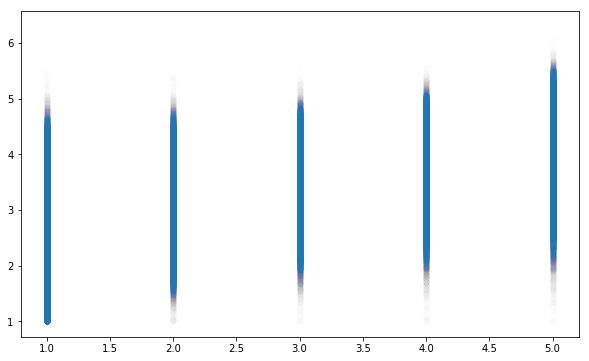

In [217]:
plt.figure(figsize=(10,6))
plt.scatter(df_check_merge.stars,df_check_merge.est_stars,alpha=0.005)

In [ ]:
# test 2nd model 

predict_surprise_

In [244]:
df_predict_ = predict_surprise_(df_test_usr5)
df_predict_.rename({'stars': 'est_stars'}, axis='columns', inplace=True)

In [245]:
df_predict_["compare"] = (df_predict_["user_id"]+":"+df_predict_["business_id"]).str.strip()
df_predict_

,user_id,business_id,est_stars,compare
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.082249,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.570050,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,5.064970,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.485882,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.431022,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,4.021082,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,3.998358,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.795849,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,4.098624,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,4.135347,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg


In [295]:
df_true_ = review_restaurant.copy()
df_true_["compare"]= (df_true_["user_id"]+":"+df_true_["business_id"]).str.strip()
df_true_

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,compare
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1,-Yz2wIcsdJxUOFMbTgoKQA,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1,jYcf_e5p0UG0S-9gJq_tNA,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1,nQC0JiPIk_jCooRDxpuw5A,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1,Gv_-mtOKhWFtCjn9xFe0SQ,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1,pabMYegF28KjHQ5hybAJ0A,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0,F_N4NyoMJWzBYFspeYfH3A,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1,oGYEaOv0IEUZ6kU3JFe98A,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3,EeKyqz_A6xeQ7ezuloqxyg,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1,ks6vHMFVaPACB18GO7XUig,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3,pngNlr9t4HObDgecGH_jaw,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg


In [247]:
df_check_merge_ = pd.DataFrame()
df_check_merge_ = pd.concat([df_true_, df_predict_] ,axis=1)
df_check_merge_

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,compare,user_id,business_id,est_stars,compare
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1,-Yz2wIcsdJxUOFMbTgoKQA,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.082249,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1,jYcf_e5p0UG0S-9gJq_tNA,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.570050,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1,nQC0JiPIk_jCooRDxpuw5A,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,5.064970,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1,Gv_-mtOKhWFtCjn9xFe0SQ,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.485882,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1,pabMYegF28KjHQ5hybAJ0A,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.431022,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0,F_N4NyoMJWzBYFspeYfH3A,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,4.021082,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1,oGYEaOv0IEUZ6kU3JFe98A,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,3.998358,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3,EeKyqz_A6xeQ7ezuloqxyg,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.795849,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1,ks6vHMFVaPACB18GO7XUig,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,4.098624,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3,pngNlr9t4HObDgecGH_jaw,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,4.135347,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg


In [248]:
np.sqrt(((df_check_merge_.est_stars - df_check_merge_.stars) ** 2).mean())

0.674940262234231

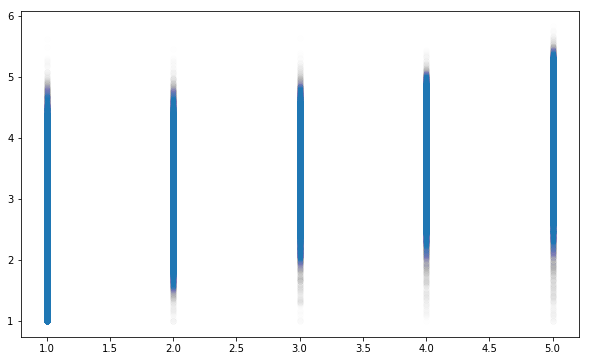

In [249]:
plt.figure(figsize=(10,6))
plt.scatter(df_check_merge_.stars,df_check_merge_.est_stars,alpha=0.005)

In [ ]:
# check whole of train data 

In [292]:
tmp = predict_surprise_(df_test_usr5)

In [293]:
tmp

,user_id,business_id,stars
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.803394
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.446177
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,5.079192
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.247600
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.442998
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,4.021806
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,4.145617
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.884411
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,3.977205
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,4.002519


In [294]:
tmp.rename({'stars': 'est_stars'}, axis='columns', inplace=True)
tmp["compare"] = (tmp["user_id"]+":"+tmp["business_id"]).str.strip()
tmp

,user_id,business_id,est_stars,compare
0,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.803394,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg
1,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.446177,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg
2,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,5.079192,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg
3,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.247600,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg
4,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.442998,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg
5,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,4.021806,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg
6,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,4.145617,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg
7,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.884411,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg
8,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,3.977205,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg
9,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,4.002519,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg


In [296]:
df_check_merge_tmp = pd.DataFrame()
df_check_merge_tmp = pd.concat([df_true_, tmp] ,axis=1)
df_check_merge_tmp

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,compare,user_id,business_id,est_stars,compare
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1,-Yz2wIcsdJxUOFMbTgoKQA,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg,-Yz2wIcsdJxUOFMbTgoKQA,PZ-LZzSlhSe9utkQYU8pFg,4.803394,-Yz2wIcsdJxUOFMbTgoKQA:PZ-LZzSlhSe9utkQYU8pFg
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1,jYcf_e5p0UG0S-9gJq_tNA,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg,jYcf_e5p0UG0S-9gJq_tNA,PZ-LZzSlhSe9utkQYU8pFg,3.446177,jYcf_e5p0UG0S-9gJq_tNA:PZ-LZzSlhSe9utkQYU8pFg
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1,nQC0JiPIk_jCooRDxpuw5A,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg,nQC0JiPIk_jCooRDxpuw5A,PZ-LZzSlhSe9utkQYU8pFg,5.079192,nQC0JiPIk_jCooRDxpuw5A:PZ-LZzSlhSe9utkQYU8pFg
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1,Gv_-mtOKhWFtCjn9xFe0SQ,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg,Gv_-mtOKhWFtCjn9xFe0SQ,PZ-LZzSlhSe9utkQYU8pFg,3.247600,Gv_-mtOKhWFtCjn9xFe0SQ:PZ-LZzSlhSe9utkQYU8pFg
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1,pabMYegF28KjHQ5hybAJ0A,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg,pabMYegF28KjHQ5hybAJ0A,PZ-LZzSlhSe9utkQYU8pFg,3.442998,pabMYegF28KjHQ5hybAJ0A:PZ-LZzSlhSe9utkQYU8pFg
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0,F_N4NyoMJWzBYFspeYfH3A,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg,F_N4NyoMJWzBYFspeYfH3A,PZ-LZzSlhSe9utkQYU8pFg,4.021806,F_N4NyoMJWzBYFspeYfH3A:PZ-LZzSlhSe9utkQYU8pFg
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1,oGYEaOv0IEUZ6kU3JFe98A,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg,oGYEaOv0IEUZ6kU3JFe98A,PZ-LZzSlhSe9utkQYU8pFg,4.145617,oGYEaOv0IEUZ6kU3JFe98A:PZ-LZzSlhSe9utkQYU8pFg
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3,EeKyqz_A6xeQ7ezuloqxyg,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg,EeKyqz_A6xeQ7ezuloqxyg,PZ-LZzSlhSe9utkQYU8pFg,4.884411,EeKyqz_A6xeQ7ezuloqxyg:PZ-LZzSlhSe9utkQYU8pFg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1,ks6vHMFVaPACB18GO7XUig,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg,ks6vHMFVaPACB18GO7XUig,PZ-LZzSlhSe9utkQYU8pFg,3.977205,ks6vHMFVaPACB18GO7XUig:PZ-LZzSlhSe9utkQYU8pFg
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3,pngNlr9t4HObDgecGH_jaw,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg,pngNlr9t4HObDgecGH_jaw,PZ-LZzSlhSe9utkQYU8pFg,4.002519,pngNlr9t4HObDgecGH_jaw:PZ-LZzSlhSe9utkQYU8pFg


In [298]:
np.sqrt(((df_check_merge_tmp.est_stars - df_check_merge_tmp.stars) ** 2).mean())

0.4449144617756419

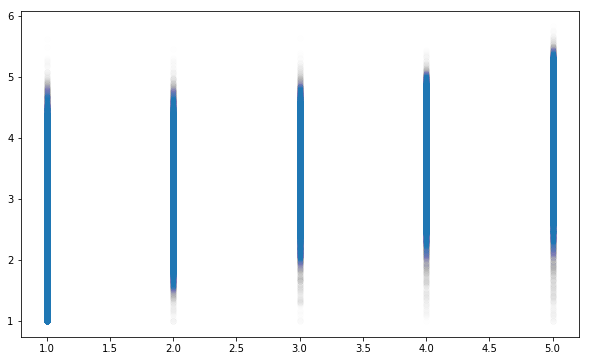

In [299]:
plt.figure(figsize=(10,6))
plt.scatter(df_check_merge_.stars,df_check_merge_.est_stars,alpha=0.005)

# DUMP MODEL 

In [302]:
file_name = os.path.expanduser('/Users/hayley/workspace/CapstoneProject/Yelp-Recommender/final_model/surpriseSVD_v0.1')
dump.dump(file_name, algo=algo_svd_, verbose=True)


The dump has been saved as file /Users/hayley/workspace/CapstoneProject/Yelp-Recommender/final_model/surpriseSVD_v0.1


In [303]:
_, loaded_algo = dump.load(file_name)


In [304]:

loaded_algo.predict(uid='3Vd_ATdvvuVVgn_YCpz8fw', iid='f4x1YBxkLrZg652xt2KR5g',verbose=True)

user: 3Vd_ATdvvuVVgn_YCpz8fw item: f4x1YBxkLrZg652xt2KR5g r_ui = None   est = 3.54   {'was_impossible': False}


Prediction(uid='3Vd_ATdvvuVVgn_YCpz8fw', iid='f4x1YBxkLrZg652xt2KR5g', r_ui=None, est=3.5391337071702793, details={'was_impossible': False})

In [306]:
algo_svd_.predict(uid='3Vd_ATdvvuVVgn_YCpz8fw', iid='f4x1YBxkLrZg652xt2KR5g',verbose=True)

user: 3Vd_ATdvvuVVgn_YCpz8fw item: f4x1YBxkLrZg652xt2KR5g r_ui = None   est = 3.54   {'was_impossible': False}


Prediction(uid='3Vd_ATdvvuVVgn_YCpz8fw', iid='f4x1YBxkLrZg652xt2KR5g', r_ui=None, est=3.5391337071702793, details={'was_impossible': False})

In [ ]:
file_name = os.path.expanduser('/Users/hayley/workspace/CapstoneProject/Yelp-Recommender/Compressed file/final_model/surpriseSVD_v0.1')
dump.dump(file_name, algo=algo_svd_, verbose=True)

_, loaded_algo = dump.load(file_name)

# We now ensure that the algo is still the same by checking the predictions.
predictions_loaded_algo = loaded_algo.test(trainset.build_testset())
assert predictions == predictions_loaded_algo
print('Predictions are the same')

# don't need!!!!! 

In [117]:
reader_1 = Reader(rating_scale=(1, 5))#(rating_scale=(0, 9))
data_1 = Dataset.load_from_df(df_test_usr1[["user_id","business_id","stars"]], reader)

# test set is made of 100% of the ratings.
trainset_1, testset_1 = train_test_split(data_1, test_size=1.0)

In [118]:
testset_1

[('2weQS-RnoOBhb1KsHKyoSQ', 'uz9waRQ_LAxVi2RDtUdp5Q', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'gtffarZ2Y_rLfCegMg-nqw', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', '0EH_sUvRkgpa4cjHm3hQNQ', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', '95TwO5NbFeH7Kz7_OYr1Ig', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'c0ZerP3dvw3x2IWXzNKDyQ', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'bAhgP8iVP7gw26KjpZ1miw', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', '5fWcM1vRg4v8HI85Vmy8OA', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'L8A8TQSGKAfxynXvQz7RUw', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'jA6fLtwQpiHzJCdsswFgfg', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'ZgPnRzWjQR5NtiauGBww7g', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'qFAw6wHMMcr4ctF-ZdGhEA', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'BN_GVKaX0jnaVI4Ar1iV2w', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'Edc4OQns2A4lqs1KT3HE-A', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'ahG8XQK5Aj4kMtOrC8zfTA', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'fpM-O9Ul62xizBq9YNO_tQ', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', '30TxDt2V8G7FWXsKaEKA9A', 0.0),
 ('2weQS-RnoOBhb1KsHKyoSQ', 'sNn7E_l6jb2

In [119]:
test_pred_user1 = algo_svd.test(testset_1)
print("SVD : Test Set")
accuracy.rmse(test_pred_user1, verbose=True)


SVD : Test Set
RMSE: 3.6545


3.654516627920998

In [120]:
test_pred_user1

[Prediction(uid='2weQS-RnoOBhb1KsHKyoSQ', iid='uz9waRQ_LAxVi2RDtUdp5Q', r_ui=0.0, est=3.7105297932111863, details={'was_impossible': False}),
 Prediction(uid='2weQS-RnoOBhb1KsHKyoSQ', iid='gtffarZ2Y_rLfCegMg-nqw', r_ui=0.0, est=2.9225498153534506, details={'was_impossible': False}),
 Prediction(uid='2weQS-RnoOBhb1KsHKyoSQ', iid='0EH_sUvRkgpa4cjHm3hQNQ', r_ui=0.0, est=3.831622052990868, details={'was_impossible': False}),
 Prediction(uid='2weQS-RnoOBhb1KsHKyoSQ', iid='95TwO5NbFeH7Kz7_OYr1Ig', r_ui=0.0, est=4.577746817369661, details={'was_impossible': False}),
 Prediction(uid='2weQS-RnoOBhb1KsHKyoSQ', iid='c0ZerP3dvw3x2IWXzNKDyQ', r_ui=0.0, est=3.0585858213021515, details={'was_impossible': False}),
 Prediction(uid='2weQS-RnoOBhb1KsHKyoSQ', iid='bAhgP8iVP7gw26KjpZ1miw', r_ui=0.0, est=3.457517064060675, details={'was_impossible': False}),
 Prediction(uid='2weQS-RnoOBhb1KsHKyoSQ', iid='5fWcM1vRg4v8HI85Vmy8OA', r_ui=0.0, est=3.2349222962790463, details={'was_impossible': False}),
 Predicti

,business_id,user_id,stars
0,4JNXUYY8wbaaDmk3BPzlWw,eAc9Vd6loOgRQolMXQt6FA,0.0
1,RESDUcs7fIiihp38-d6_6g,eAc9Vd6loOgRQolMXQt6FA,0.0
2,K7lWdNUhCbcnEvI0NhGewg,eAc9Vd6loOgRQolMXQt6FA,0.0
3,f4x1YBxkLrZg652xt2KR5g,eAc9Vd6loOgRQolMXQt6FA,0.0
4,cYwJA2A6I12KNkm2rtXd5g,eAc9Vd6loOgRQolMXQt6FA,0.0
5,DkYS3arLOhA8si5uUEmHOw,eAc9Vd6loOgRQolMXQt6FA,0.0
6,2weQS-RnoOBhb1KsHKyoSQ,eAc9Vd6loOgRQolMXQt6FA,0.0
7,5LNZ67Yw9RD6nf4_UhXOjw,eAc9Vd6loOgRQolMXQt6FA,0.0
8,iCQpiavjjPzJ5_3gPD5Ebg,eAc9Vd6loOgRQolMXQt6FA,0.0
9,ujHiaprwCQ5ewziu0Vi9rw,eAc9Vd6loOgRQolMXQt6FA,0.0


In [122]:
reader_2 = Reader(rating_scale=(1, 5))#(rating_scale=(0, 9))
data_2 = Dataset.load_from_df(df_test_usr2[["user_id","business_id","stars"]], reader)

# test set is made of 100% of the ratings.
trainset_2, testset_2 = train_test_split(data_2, test_size=1.0)

In [123]:
testset_2

[('eAc9Vd6loOgRQolMXQt6FA', 'rcn2JoLFQhMZeDHfOZiw2w', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'DYAorbxOyubUB_wtQRCdug', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'jAty2pgHVlp0sLyQo05r6Q', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', '4Pb7SlTK89uSdqOwMNM35A', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', '5LNZ67Yw9RD6nf4_UhXOjw', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'zCpFWnrtttP7vKZIuyClVA', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', '8menaxER6kxM_Lyi5tBmSA', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', '2QbWs3zL31_pRN2xo3obwA', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'O589S0opFB9oK8VcL5tRcA', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'Fkj8vJocYilePMZv2y54WA', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'AztVIokc5VtP4m8r6kSnWw', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'lXOdSzpRY1B94wT3K7Tlmw', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'rQjEeJ3zlf1OFVO0kgH64A', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'bVd68hILQ-vxwkAKZlkVuA', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'V78f9CdEVTkKFkyhdTYVrQ', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'XVA_j7ACtBZ7vx7Hda6eJw', 0.0),
 ('eAc9Vd6loOgRQolMXQt6FA', 'uDeycmwCy26

In [124]:
test_pred_usr2 = algo_svd.test(testset_2)
print("SVD : Test Set")
accuracy.rmse(test_pred_usr2, verbose=True)


SVD : Test Set
RMSE: 3.6545


3.654516627920998

In [125]:
test_pred_usr2

[Prediction(uid='eAc9Vd6loOgRQolMXQt6FA', iid='rcn2JoLFQhMZeDHfOZiw2w', r_ui=0.0, est=3.5700115788404396, details={'was_impossible': False}),
 Prediction(uid='eAc9Vd6loOgRQolMXQt6FA', iid='DYAorbxOyubUB_wtQRCdug', r_ui=0.0, est=3.8730235546598246, details={'was_impossible': False}),
 Prediction(uid='eAc9Vd6loOgRQolMXQt6FA', iid='jAty2pgHVlp0sLyQo05r6Q', r_ui=0.0, est=4.088199328006993, details={'was_impossible': False}),
 Prediction(uid='eAc9Vd6loOgRQolMXQt6FA', iid='4Pb7SlTK89uSdqOwMNM35A', r_ui=0.0, est=3.17106246716327, details={'was_impossible': False}),
 Prediction(uid='eAc9Vd6loOgRQolMXQt6FA', iid='5LNZ67Yw9RD6nf4_UhXOjw', r_ui=0.0, est=3.652241443373115, details={'was_impossible': False}),
 Prediction(uid='eAc9Vd6loOgRQolMXQt6FA', iid='zCpFWnrtttP7vKZIuyClVA', r_ui=0.0, est=3.4490724885159536, details={'was_impossible': False}),
 Prediction(uid='eAc9Vd6loOgRQolMXQt6FA', iid='8menaxER6kxM_Lyi5tBmSA', r_ui=0.0, est=2.8920141931160575, details={'was_impossible': False}),
 Predictio

In [129]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x1bd642570>

In [141]:
new_df = pd.DataFrame(columns=['uid', 'iid', 'est'])
new_df

,uid,iid,est


In [150]:
def toDataFrame(predict_result):
    new_df = pd.DataFrame(columns=['uid', 'iid', 'est'])
    for uid, iid, true_r, est, _ in predict_result:
       # new_df["uid"] = uid
       # new_df["iid"]= iid
       # new_df["est"]= est
        new_df = new_df.append(pd.DataFrame([[uid, iid, est]], columns=['uid', 'iid', 'est']), ignore_index=True)
    return new_df

In [ ]:
test_pred = algo_svd.test(data1)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)


In [ ]:
# SVD base 
# ----- SVD ----- #

param_grid = {'n_factors': [110, 120, 140, 160], 'n_epochs': [90, 100, 110], 'lr_all': [0.001, 0.003, 0.005, 0.008],
              'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=, verbose=True)

# Use the new parameters with the train data
algo = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
algo.fit(trainset)
test_pred = algo.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)


## BASEONLY 

In [31]:
## Using ALS
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo_als = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo_als, data, measures=['RMSE'], cv=3, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2410  1.2419  1.2415  1.2415  0.0004  
Fit time          3.51    3.25    3.82    3.53    0.23    
Test time         4.86    3.88    3.43    4.06    0.60    


{'test_rmse': array([1.24096898, 1.24194984, 1.24154112]),
 'fit_time': (3.508251905441284, 3.2541451454162598, 3.8223838806152344),
 'test_time': (4.863075017929077, 3.878567934036255, 3.434123992919922)}

In [32]:
# test traing & prediction 
predictions_als = algo_als.fit(trainset).test(testset)
accuracy.rmse(predictions_als)

Estimating biases using als...
RMSE: 1.2370


1.2370227957415918

In [33]:
trainset

In [37]:
predictions_als

[Prediction(uid='n_a826hPtfMFnucaVwnqIg', iid='WhYep5bRqXpaejOTH6ukbw', r_ui=5.0, est=4.144069782099217, details={'was_impossible': False}),
 Prediction(uid='VizhcyMWWPz3UDXEBeix4w', iid='WO1sgbYB6u6VVcvChanp5g', r_ui=3.0, est=2.9692052263486897, details={'was_impossible': False}),
 Prediction(uid='zbrH2lnZgWicvwoXR0qcSg', iid='--9e1ONYQuAa-CB_Rrw7Tw', r_ui=5.0, est=4.074913526419188, details={'was_impossible': False}),
 Prediction(uid='3C9NRS1MpGpD5pMi2jdwfA', iid='Cu5icjH_psCatgvN4fU1-A', r_ui=1.0, est=3.9658495611265994, details={'was_impossible': False}),
 Prediction(uid='6RUKRj1qsBB79r0OY5D8vA', iid='PgJgpW4TKQ8IoALH2Yq-zA', r_ui=3.0, est=2.8138914068590353, details={'was_impossible': False}),
 Prediction(uid='EfnzVzqWJUVEv8ft3fW2sQ', iid='DPcLpPpsdWUvfHoreMRxpw', r_ui=5.0, est=4.031964269232531, details={'was_impossible': False}),
 Prediction(uid='UvFhbG9eHJNNxYiHGluJSA', iid='CoyeXg8FBsS_d20QzNIy-A', r_ui=5.0, est=4.552722935156557, details={'was_impossible': False}),
 Predictio

In [35]:
## Using SGD
bsl_options = {'method': 'sgd',
               'learning_rate': .01 #.00005,0.001
               }
algo_sgd = BaselineOnly(bsl_options=bsl_options,verbose=True)
cross_validate(algo_sgd, data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


{'test_rmse': array([1.24663334, 1.24371886, 1.24622862]),
 'fit_time': (8.409970760345459, 8.357922077178955, 8.336057901382446),
 'test_time': (3.9415080547332764, 4.544766902923584, 4.272753953933716)}

In [36]:
# test traing & prediction 
predictions_sgd= algo_sgd.fit(trainset).test(testset)
accuracy.rmse(predictions_sgd)

Estimating biases using sgd...
RMSE: 1.2432


1.2432289275374033

In [38]:
predictions_sgd

[Prediction(uid='n_a826hPtfMFnucaVwnqIg', iid='WhYep5bRqXpaejOTH6ukbw', r_ui=5.0, est=4.203395839185227, details={'was_impossible': False}),
 Prediction(uid='VizhcyMWWPz3UDXEBeix4w', iid='WO1sgbYB6u6VVcvChanp5g', r_ui=3.0, est=2.73790791619883, details={'was_impossible': False}),
 Prediction(uid='zbrH2lnZgWicvwoXR0qcSg', iid='--9e1ONYQuAa-CB_Rrw7Tw', r_ui=5.0, est=4.047445940630937, details={'was_impossible': False}),
 Prediction(uid='3C9NRS1MpGpD5pMi2jdwfA', iid='Cu5icjH_psCatgvN4fU1-A', r_ui=1.0, est=3.8990792685102944, details={'was_impossible': False}),
 Prediction(uid='6RUKRj1qsBB79r0OY5D8vA', iid='PgJgpW4TKQ8IoALH2Yq-zA', r_ui=3.0, est=2.573205761607715, details={'was_impossible': False}),
 Prediction(uid='EfnzVzqWJUVEv8ft3fW2sQ', iid='DPcLpPpsdWUvfHoreMRxpw', r_ui=5.0, est=4.151284871383339, details={'was_impossible': False}),
 Prediction(uid='UvFhbG9eHJNNxYiHGluJSA', iid='CoyeXg8FBsS_d20QzNIy-A', r_ui=5.0, est=4.954932825436982, details={'was_impossible': False}),
 Prediction(u

In [50]:
pred_ = algo_sgd.predict( uid='bLbSNkLggFnqwNNzzq-Ijw', iid='uz9waRQ_LAxVi2RDtUdp5Q',verbose=True)
pred_

user: bLbSNkLggFnqwNNzzq-Ijw item: uz9waRQ_LAxVi2RDtUdp5Q r_ui = None   est = 3.06   {'was_impossible': False}


Prediction(uid='bLbSNkLggFnqwNNzzq-Ijw', iid='uz9waRQ_LAxVi2RDtUdp5Q', r_ui=None, est=3.0585340651823705, details={'was_impossible': False})

In [51]:
pred2_ = algo_sgd.predict(uid='RQlnSCjuqMnhR3Qk6j4KoA',  iid='uz9waRQ_LAxVi2RDtUdp5Q', verbose=True)
pred2_

user: RQlnSCjuqMnhR3Qk6j4KoA item: uz9waRQ_LAxVi2RDtUdp5Q r_ui = None   est = 3.48   {'was_impossible': False}


Prediction(uid='RQlnSCjuqMnhR3Qk6j4KoA', iid='uz9waRQ_LAxVi2RDtUdp5Q', r_ui=None, est=3.4776423590270618, details={'was_impossible': False})

In [52]:
pred1__ = algo_als.predict( uid='bLbSNkLggFnqwNNzzq-Ijw', iid='uz9waRQ_LAxVi2RDtUdp5Q',r_ui=3, verbose=True)
pred2__ = algo_als.predict( uid='RQlnSCjuqMnhR3Qk6j4KoA', iid='uz9waRQ_LAxVi2RDtUdp5Q',r_ui=4, verbose=True)



user: bLbSNkLggFnqwNNzzq-Ijw item: uz9waRQ_LAxVi2RDtUdp5Q r_ui = 3.00   est = 2.99   {'was_impossible': False}
user: RQlnSCjuqMnhR3Qk6j4KoA item: uz9waRQ_LAxVi2RDtUdp5Q r_ui = 4.00   est = 3.57   {'was_impossible': False}


### TEST CUT review 100 by user review count 

In [72]:
review_restaurant

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0.0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1.0,-Yz2wIcsdJxUOFMbTgoKQA
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0.0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1.0,jYcf_e5p0UG0S-9gJq_tNA
2,2,PZ-LZzSlhSe9utkQYU8pFg,0,2010-01-13 00:35:45,0.0,iRLX3dJ3ONvncIxPnXy1cw,5.0,Basically the best Italian in town for the pri...,1.0,nQC0JiPIk_jCooRDxpuw5A
3,3,PZ-LZzSlhSe9utkQYU8pFg,0,2008-08-23 20:30:33,0.0,rklteWf9xnTU3fAtMFBRRw,3.0,Mmmmm delicious food and a little history. Mr....,1.0,Gv_-mtOKhWFtCjn9xFe0SQ
4,4,PZ-LZzSlhSe9utkQYU8pFg,0,2009-06-01 20:02:55,0.0,UfRqM0RGdZa86hFcFEAnjw,3.0,"This is old Vegas, this atmosphere is old scho...",1.0,pabMYegF28KjHQ5hybAJ0A
5,5,PZ-LZzSlhSe9utkQYU8pFg,0,2010-05-22 16:54:57,0.0,1RtC0WIuMR5x88uoFOPyEA,4.0,"Heavy on the atmosphere, heavy on the red sauc...",0.0,F_N4NyoMJWzBYFspeYfH3A
6,6,PZ-LZzSlhSe9utkQYU8pFg,0,2008-09-01 21:55:05,0.0,N7HxJSicQPM_EDAaCtxYSQ,4.0,This place is fun. I gave it an extra star bec...,1.0,oGYEaOv0IEUZ6kU3JFe98A
7,7,PZ-LZzSlhSe9utkQYU8pFg,0,2015-04-03 03:59:34,0.0,0TirbR6wC54dSCpQZ4fT_g,5.0,NOT CLOSED!!!\nMoved to new address.\n\n9821 S...,3.0,EeKyqz_A6xeQ7ezuloqxyg
8,8,PZ-LZzSlhSe9utkQYU8pFg,0,2011-05-06 03:31:40,0.0,tjTwFXnD1ZS-VUFBvwEIxw,4.0,I like this place solely on its atmosphere. I...,1.0,ks6vHMFVaPACB18GO7XUig
9,9,PZ-LZzSlhSe9utkQYU8pFg,2,2010-08-29 16:19:05,0.0,scfa_akireCU7Pxi0nvAtg,4.0,This is actually a 3.5 star review and I'm giv...,3.0,pngNlr9t4HObDgecGH_jaw


In [65]:
user_review_cnt = pd.read_csv('./yelp_dataset/user_review_cnt.csv')


In [83]:
user_review_cnt_tmp = user_review_cnt[user_review_cnt["count"] > 100]
user_review_cnt_tmp

,user_id,count
463860,8Ae52apMLbD3jhHcaQ_Zzw,101
463861,LaNC8-1OyFAZZH1HU-z9BA,101
463862,ewDNa_FRoG71UFm56eTGkw,101
463863,oknzpMgHOnbijayveG-PKQ,101
463864,7Q6nBHl6NJ9gbJ900FkkAg,101
463865,dIHHaoF-yyIvBFEOyEQ8Pw,101
463866,Xsyw11gZiltqWL5RvWGKJg,101
463867,xU4silHWZGOWz92hPIdFpQ,101
463868,z4RytucxI_XfcMFaEI2DRg,101
463869,XqsuWJIwdy0OXYvUX1I2-Q,101


In [73]:
data_cut_100 = pd.merge(review_restaurant,user_review_cnt_tmp,on='user_id')
data_cut_100

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,count
0,11,PZ-LZzSlhSe9utkQYU8pFg,0,2011-03-29 00:39:22,1.0,ArL4pdlaqGDXKQEC_ekzhg,3.0,I guess I need someone to tell me just what is...,2.0,YMgZqBUAddmFErxLtCfK_w,442
1,3685,e1DfwqDhYQYLKoyHmJu0hQ,2,2015-05-25 17:17:55,1.0,XHDXLN8l8NlQDDwj--yyRQ,4.0,This wing spot is tucked away inside a sports ...,5.0,YMgZqBUAddmFErxLtCfK_w,442
2,12696,rTZVcJZ8G80i6NjLw0SW8Q,1,2011-11-18 18:43:53,1.0,2TG8psMgFzNy1SqKP1IHJg,3.0,Can't say my stay here was all that great. How...,2.0,YMgZqBUAddmFErxLtCfK_w,442
3,17762,Wxxvi3LZbHNIDwJ-ZimtnA,0,2011-11-20 20:22:55,1.0,0HyURQdwSAjkBOfOj5ZNWA,3.0,"Oh Venetian, if only you weren't owned by one ...",0.0,YMgZqBUAddmFErxLtCfK_w,442
4,22628,YPK024huhY2np5hJ_5qWCw,1,2011-02-16 18:20:12,0.0,M44JAhtUXyvFxA5x4pVwgw,3.0,I guess I just don't get the appeal. It is not...,1.0,YMgZqBUAddmFErxLtCfK_w,442
5,22630,YPK024huhY2np5hJ_5qWCw,1,2015-08-21 20:35:58,1.0,OtRA74g-hTD98QG1v-g-7Q,5.0,This place has undergone some changes and it's...,1.0,YMgZqBUAddmFErxLtCfK_w,442
6,24092,c_iQzwsTDYraPvHSKz88QA,2,2011-03-27 18:54:23,0.0,GJLJLIWqLU6UNeTiQXw0qA,4.0,It's hard to actually rate this place as the r...,1.0,YMgZqBUAddmFErxLtCfK_w,442
7,25859,WRQ-9LluyivReFiQZFUujw,1,2014-12-01 18:47:20,0.0,SEkaKFCmd_wgz-D6qbGFaA,4.0,This was a great find - thanks Yelp! Yumminess...,1.0,YMgZqBUAddmFErxLtCfK_w,442
8,28614,rIGPzxycWfmGQS3RHpVaNA,1,2015-09-29 20:10:37,3.0,0ZWoeis1hYZFuulFSRKAJA,2.0,We had quite the underwhelming experience here...,4.0,YMgZqBUAddmFErxLtCfK_w,442
9,30270,xDvl_i1g1HCJ4EmIRmwfqg,5,2016-09-27 20:10:36,2.0,F-Qua_oJ38vcc6cRjVkDAw,3.0,"It's a Denny's, but a little bit amped up to b...",3.0,YMgZqBUAddmFErxLtCfK_w,442


In [74]:
df_1 = data_cut_100[["user_id","business_id","stars"]]

In [75]:
reader = Reader(rating_scale=(1, 5))#(rating_scale=(0, 9))
data_1 = Dataset.load_from_df(df_1[["user_id","business_id","stars"]], reader)
# test set is made of 25% of the ratings.
trainset_1, testset_1 = train_test_split(data_1, test_size=.15)

In [76]:
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data_1, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.95839943, 0.95863903, 0.95327324]),
 'fit_time': (0.10377907752990723, 0.12349104881286621, 0.11817407608032227),
 'test_time': (0.16916680335998535, 0.16375398635864258, 0.17020010948181152)}

In [77]:
predictions = algo.fit(trainset_1).test(testset_1)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9476


0.9475779709308696

In [78]:
predictions

[Prediction(uid='N3oNEwh0qgPqPP3Em6wJXw', iid='uUEKndnFbHD8mVkGiirtpA', r_ui=3.0, est=4.000208677225692, details={'was_impossible': False}),
 Prediction(uid='CQZpblGIHeMlD7KqNP7J7Q', iid='9PIC380tmNYpIC3z5cvcNA', r_ui=4.0, est=4.0175918122430305, details={'was_impossible': False}),
 Prediction(uid='y3FcL4bLy0eLlkb0SDPnBQ', iid='EHDcxAlrrP4VPiZuQlrIrg', r_ui=3.0, est=3.077721207473374, details={'was_impossible': False}),
 Prediction(uid='OLn8EvPsu4hNug8V5PF2jA', iid='-INdswGdyRyy72xXHalNbg', r_ui=3.0, est=2.137346463282594, details={'was_impossible': False}),
 Prediction(uid='UYcmGbelzRa0Q6JqzLoguw', iid='-8R_-EkGpUhBk55K9Dd4mg', r_ui=3.0, est=2.9317601432191003, details={'was_impossible': False}),
 Prediction(uid='8QKrhvVqhEkD8xo4E4s0GQ', iid='b4a9xvX1LtwcZx6a5SiFVw', r_ui=3.0, est=3.695240753377353, details={'was_impossible': False}),
 Prediction(uid='alr2xk5KBJXHd6zVuEqdDg', iid='mC_nDW9tAQwWcHsfvjUAEQ', r_ui=5.0, est=3.7497822642049505, details={'was_impossible': False}),
 Predictio

#### review 10

In [107]:
user_review_cnt_tmp2 = user_review_cnt[user_review_cnt["count"] > 0]
user_review_cnt_tmp2

,user_id,count
0,zzzmshdEWLFCApxETl1TGQ,1
1,PykVQFhl-eSuylTS2JY8uw,1
2,PymOGax7sMPD8JdyHK2Y6A,1
3,Pymm7PvQAbCSPQObi8BDKQ,1
4,Pyo7W__nTof1X_TKfq0M-A,1
5,PyoYysitFMPAq1B0kHLccw,1
6,PyoZQfrf6CIBS-r-_roF6Q,1
7,Pyo_hq4aHqKKYOY42cWMvw,1
8,PyoyVMhPEe8_-hIp9e3PcA,1
9,lIJhE6xCh19b9Zu16nV0XA,1


In [108]:
data_cut_10 = pd.merge(review_restaurant,user_review_cnt_tmp2,on='user_id')
data_cut_10

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,count
0,0,PZ-LZzSlhSe9utkQYU8pFg,0,2011-06-29 02:55:07,0.0,klcF45wKIOpJW_BhJslOJg,5.0,"We went there for dinner the other night, bein...",1.0,-Yz2wIcsdJxUOFMbTgoKQA,1
1,1,PZ-LZzSlhSe9utkQYU8pFg,0,2010-10-06 18:20:13,0.0,Li-pQG6A7p5gbgZHTMeDSQ,4.0,i had the best Chicken Marcela ever. The spagh...,1.0,jYcf_e5p0UG0S-9gJq_tNA,10
2,272940,zEaGcSVPDQipnRdEZp-F6g,0,2015-12-30 02:05:39,0.0,XJdL39gJ9PZuzjBnHJs5GQ,2.0,This was the third time at Dom DeMarco's. I ha...,0.0,jYcf_e5p0UG0S-9gJq_tNA,10
3,296329,cJWbbvGmyhFiBpG_5hf5LA,0,2016-06-22 05:01:45,0.0,h3HRYqugdRrP1XTC5Y4pbg,1.0,I hadn't been to this restaurant in over a yea...,1.0,jYcf_e5p0UG0S-9gJq_tNA,10
4,440793,jBh399TajGcH28Zo2J1pHw,0,2016-01-10 13:38:38,0.0,WOhDpiRw--D1bzxVtbIv3w,1.0,Heard a lot about this hamburger place and tri...,1.0,jYcf_e5p0UG0S-9gJq_tNA,10
5,840402,So132GP_uy3XbGs0KNyzyw,0,2010-10-06 18:15:00,1.0,NyS2VYFbCy9l1sHPXzCQMg,1.0,This is perhaps the worst Italian restaurant t...,0.0,jYcf_e5p0UG0S-9gJq_tNA,10
6,936190,g8OnV26ywJlZpezdBnOWUQ,0,2011-10-24 00:00:09,0.0,HwU8sAeS1FTtBF-XrW1d3A,3.0,"Food was overpriced, but good. If you like lou...",1.0,jYcf_e5p0UG0S-9gJq_tNA,10
7,965987,m-xsH8VkcYtTTvp2Fa6Ajw,1,2015-12-02 03:28:45,0.0,ZVTHj2c3mpdi-8YUmWhspw,4.0,First time customer. My date and I only went t...,2.0,jYcf_e5p0UG0S-9gJq_tNA,10
8,1046213,bLCdohUvOM7l1OcXifmblw,0,2011-06-18 16:40:18,1.0,cnpx1s4t5cZL0En5ExSnFw,1.0,If you are looking for a place that has loud r...,0.0,jYcf_e5p0UG0S-9gJq_tNA,10
9,1183765,CauQnqZ5eowyrr7oWF_p3Q,0,2014-01-12 20:05:05,0.0,CAc0Xn62Yfuc5J6P0KH4DQ,2.0,I heard about Road Kill on DD&D and since my f...,2.0,jYcf_e5p0UG0S-9gJq_tNA,10


In [109]:
df_2 = data_cut_10[["user_id","business_id","stars"]]

In [110]:
reader = Reader(rating_scale=(1, 5))#(rating_scale=(0, 9))
data_2 = Dataset.load_from_df(df_2[["user_id","business_id","stars"]], reader)
# test set is made of 25% of the ratings.
trainset_2, testset_2 = train_test_split(data_2, test_size=.15)

In [111]:
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data_2, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([1.24098915, 1.24209076, 1.24166513]),
 'fit_time': (3.4075019359588623, 3.815972089767456, 4.11284875869751),
 'test_time': (4.38936710357666, 4.822847127914429, 4.601262092590332)}

In [112]:
predictions2 = algo.fit(trainset_2).test(testset_2)
accuracy.rmse(predictions2)

Estimating biases using als...
RMSE: 1.2347


1.2346822718418315

In [113]:
predictions2

[Prediction(uid='giVDRHuUk85jhDz17581Fw', iid='VrGI7_nRjXpn0415S3coGQ', r_ui=4.0, est=4.289780839853653, details={'was_impossible': False}),
 Prediction(uid='_TXC7A7vlXJqh7cHAmS1bg', iid='9WAnQD1nj1j3zLZ7ONtvfQ', r_ui=5.0, est=3.543027602896158, details={'was_impossible': False}),
 Prediction(uid='wMjMTmzLcA3Pw7KuRKJ8FA', iid='q3dJQtwZQrrurNT-1bNKgQ', r_ui=5.0, est=4.121854792930009, details={'was_impossible': False}),
 Prediction(uid='39TB_7aL0kvYRJdJ8howfA', iid='1MrSwj8i2VEBHdp3IsWCpQ', r_ui=5.0, est=4.822780281311015, details={'was_impossible': False}),
 Prediction(uid='N00VoXdiyEBwOIWwD5PYKA', iid='h2RbC1Lu20L1GHim_p24WQ', r_ui=3.0, est=3.3997724748059306, details={'was_impossible': False}),
 Prediction(uid='yqaLDVay-buQVAXsC4r5sA', iid='HhVmDybpU7L50Kb5A0jXTg', r_ui=1.0, est=3.4234447133717802, details={'was_impossible': False}),
 Prediction(uid='7w89D7MNvgXYI7QZhYSiUw', iid='2UgRg5a6KmpbD_SZfhNrKg', r_ui=3.0, est=4.537085551157156, details={'was_impossible': False}),
 Prediction

## SVD++ SKIP!!!!!! 

In [17]:
# Not working... 
svdpp_gs = GridSearchCV(SVDpp, svd_param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=3)
svdpp_gs.fit(data)

In [18]:
print('SVDpp - RMSE:', round(svdpp_gs.best_score['rmse'], 4), '; MAE:', round(svdpp_gs.best_score['mae'], 4))
print('SVD   - RMSE:', round(svd_gs.best_score['rmse'], 4), '; MAE:', round(svd_gs.best_score['mae'], 4))

SVDpp - RMSE: nan ; MAE: nan
SVD   - RMSE: nan ; MAE: nan


In [19]:
print('RMSE =', svdpp_gs.best_params['rmse'])
print('MAE =', svdpp_gs.best_params['mae'])

RMSE = {'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.2}
MAE = {'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.2}


In [ ]:
# ADD Grid Search 

In [ ]:
## SVD

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator['rmse']
algo.fit(trainset) #data.build_full_trainset())

import pandas as pd  # noqa
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df

In [ ]:
param_grid = {'n_factors': [110, 120, 140, 160], 'n_epochs': [90, 100, 110], 'lr_all': [0.001, 0.003, 0.005, 0.008],
              'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


In [ ]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

In [ ]:

algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

#### EXAMPLE

In [8]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/hayley/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9406  0.9315  0.9241  0.9404  0.9389  0.9351  0.0064  
MAE (testset)     0.7407  0.7341  0.7288  0.7419  0.7396  0.7370  0.0049  
Fit time          4.34    4.42    4.49    4.44    4.25    4.39    0.09    
Test time         0.15    0.16    0.18    0.19    0.15    0.16    0.02    


{'test_rmse': array([0.9406021 , 0.93153842, 0.9240529 , 0.94039251, 0.93891943]),
 'test_mae': array([0.74071406, 0.73409087, 0.72877258, 0.74187868, 0.73955435]),
 'fit_time': (4.34053111076355,
  4.422378778457642,
  4.487178087234497,
  4.440570116043091,
  4.245060920715332),
 'test_time': (0.15212798118591309,
  0.15541291236877441,
  0.18036723136901855,
  0.1852428913116455,
  0.14835882186889648)}

In [ ]:
import numpy as np


class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """

        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        self._P = np.random.normal(size=(self._num_users, self._k))
        self._Q = np.random.normal(size=(self._num_items, self._k))

        # init biases
        self._b_P = np.zeros(self._num_users)
        self._b_Q = np.zeros(self._num_items)
        self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):

            # rating이 존재하는 index를 기준으로 training
            for i in range(self._num_users):
                for j in range(self._num_items):
                    if self._R[i, j] > 0:
                        self.gradient_descent(i, j, self._R[i, j])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        xi, yi = self._R.nonzero()
        predicted = self.get_complete_matrix()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - predicted[x, y], 2)
        return np.sqrt(cost) / len(xi)


    def gradient(self, error, i, j):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Q[j, :]) - (self._reg_param * self._P[i, :])
        dq = (error * self._P[i, :]) - (self._reg_param * self._Q[j, :])
        return dp, dq


    def gradient_descent(self, i, j, rating):
        """
        graident descent function

        :param i: user index of matrix
        :param j: item index of matrix
        :param rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        self._b_P[i] += self._learning_rate * (error - self._reg_param * self._b_P[i])
        self._b_Q[j] += self._learning_rate * (error - self._reg_param * self._b_Q[j])

        # update latent feature
        dp, dq = self.gradient(error, i, j)
        self._P[i, :] += self._learning_rate * dp
        self._Q[j, :] += self._learning_rate * dq


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        return self._b + self._b_P[i] + self._b_Q[j] + self._P[i, :].dot(self._Q[j, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_P[:, np.newaxis] + self._b_Q[np.newaxis:, ] + self._P.dot(self._Q.T)


    def print_results(self):
        """
        print fit results
        """

        print("User Latent P:")
        print(self._P)
        print("Item Latent Q:")
        print(self._Q.T)
        print("P x Q:")
        print(self._P.dot(self._Q.T))
        print("bias:")
        print(self._b)
        print("User Latent bias:")
        print(self._b_P)
        print("Item Latent bias:")
        print(self._b_Q)
        print("Final R matrix:")
        print(self.get_complete_matrix())
        print("Final RMSE:")
        print(self._training_process[self._epochs-1][1])


# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)
    R = np.array([
        [1, 0, 0, 1, 3],
        [2, 0, 3, 1, 1],
        [1, 2, 0, 5, 0],
        [1, 0, 0, 4, 4],
        [2, 1, 5, 4, 0],
        [5, 1, 5, 4, 0],
        [0, 0, 0, 1, 0],
    ])

    # P, Q is (7 X k), (k X 5) matrix
    factorizer = MatrixFactorization(R, k=3, learning_rate=0.01, reg_param=0.01, epochs=300, verbose=True)
    factorizer.fit()
    factorizer.print_results()